In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
df = pd.read_csv("../Datasets/courses.csv")
df.head()

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,HarvardX,CS50x,10/15/2012,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,...,11.11,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,HarvardX,PH207x,10/15/2012,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",1,1,52521,10729,...,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33


In [6]:
df_original = df.copy(deep = True)
df.shape

(290, 23)

In [7]:
df.drop(["Honor Code Certificates","% Certified of > 50% Course Content Accessed", "Total Course Hours (Thousands)"], axis = 1, inplace=True)

In [8]:
df.shape

(290, 20)

*Remove non-float value*

In [9]:
df[df["% Played Video"] == '---']

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
9,HarvardX,ER22x,03/02/2013,Justice,Michael Sandel,"Humanities, History, Design, Religion, and Edu...",1,58779,9425,5438,16.05,9.26,---,21.86,20.98,13.67,30.0,60.42,39.58,69.78


In [10]:
df.at[9, "% Played Video"] = 0.

In [11]:
df.astype({"% Played Video":"float64"}).dtypes

Institution                                 object
Course Number                               object
Launch Date                                 object
Course Title                                object
Instructors                                 object
Course Subject                              object
Year                                         int64
Participants (Course Content Accessed)       int64
Audited (> 50% Course Content Accessed)      int64
Certified                                    int64
% Audited                                  float64
% Certified                                float64
% Played Video                             float64
% Posted in Forum                          float64
% Grade Higher Than Zero                   float64
Median Hours for Certification             float64
Median Age                                 float64
% Male                                     float64
% Female                                   float64
% Bachelor's Degree or Higher  

In [12]:
df["% Played Video"] = [float(val) for val in df["% Played Video"]]

In [13]:
df.columns

Index(['Institution', 'Course Number', 'Launch Date', 'Course Title',
       'Instructors', 'Course Subject', 'Year',
       'Participants (Course Content Accessed)',
       'Audited (> 50% Course Content Accessed)', 'Certified', '% Audited',
       '% Certified', '% Played Video', '% Posted in Forum',
       '% Grade Higher Than Zero', 'Median Hours for Certification',
       'Median Age', '% Male', '% Female', '% Bachelor's Degree or Higher'],
      dtype='object')

In [14]:
df.shape

(290, 20)

In [15]:
len(set(df["Course Number"]))

188

In [16]:
df[df["Instructors"].isnull()]

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
221,HarvardX,CS50x,01/01/2016,Introduction to Computer Science (2016),NaN,Computer Science,4,168335,10245,417,6.09,0.25,69.02,0.0,0.0,0.0,23.0,77.44,22.56,49.51


*Deal with NaN value in Instructors' list*

In [17]:
df.at[221, "Instructors"] = ""

## Combine Rows for the Same Course ##

In [18]:
course_occurences = df["Course Number"].value_counts()
course_occurences

6.00.1x       9
3.091x        7
6.002x        5
6.00.2x       5
14.73x        4
             ..
ENGSCI137x    1
11.127x       1
ESD.SCM1x     1
HDS1544.1x    1
18.01.2x      1
Name: Course Number, Length: 188, dtype: int64

In [19]:
# Define function to combine duplicate records

test_course = "6.00.1x"

def combine_course_instances(course, df=df):
    '''
        Combines multiple instances of the same course preserving original launch dates, combini
        the list of all instructors, and either summing or averaging course statistics, as appropriate.
        
        Inputs:
            - course: course code attached to multiple entries
            - df: dataframe in which the course exists
    
    '''
    instances = df[df["Course Number"]==course]
    #print( instances["Instructors"])
#     print(instances)
    
    # Keep first record of launch date and course title
    institution = list(instances["Institution"])[0]
    course_title = list(instances["Course Title"])[0]
    launch_date = list(instances["Launch Date"])[0]
    
    row = instances.groupby("Course Number").agg({
                                            "Institution": lambda x: institution,
                                            "Course Number": lambda x: course,
                                            "Launch Date": lambda x: launch_date,
                                            "Course Title": lambda x: course_title,
                                            "Instructors": lambda x: get_instructors(instances["Instructors"]),
                                            "Course Subject": lambda x :list(instances["Course Subject"])[0],
                                            "Year":"max",
                                            "Participants (Course Content Accessed)": "sum",
                                            "Certified": "sum",
                                            "Audited (> 50% Course Content Accessed)": "mean",
                                            "Certified": "sum",
                                            "% Audited": "mean",
                                            "% Certified": "mean",
                                            "% Played Video": "mean",
                                            "% Posted in Forum": "mean",
                                            "% Grade Higher Than Zero": "mean",
                                            "Median Hours for Certification": "mean",
                                            "Median Age": "mean",
                                            "% Male": "mean",
                                            "% Female": "mean",
                                            "% Bachelor's Degree or Higher": "mean"
    })
#     print(row)
    return row

def get_instructors(combined_instructors):
    
    '''
        Converts a list of all instructor records into a list of individually separated,
        unique instructor names.
        
        Input:
            - combined_instructors: list containing combined instructor names for one or more
                                    instances of a course
        
        Output:
            - instructors_list: list of unique instructor names across all instances of a course
    '''
    
    # Define empty list to store individual instructors
    instructors_list = []
    
    # Build complete list of instructors
    for cluster in combined_instructors:
        # Store instructors temporarily
        temp_list = cluster.split(',')
        
        # Remove possible spaces at the beginning and
        #    add to list if name not already included
        for instructor in temp_list:
            inst = re.sub(r"(^\s?)", "", instructor)    # remove leading space
            # Append value only if it does not already exist
            if inst not in instructors_list:
                instructors_list.append(inst)
                
#     print(full_list)
    return instructors_list

In [20]:
# to keep: institution, launch date, course title, instructors, course subject

In [21]:
# Formula to isolate index in df by course number
# df.loc[df["Course Number"] == "3.15.3x"].index[0]

## Designate Duplicate and Unique Courses ##

In [22]:
# duplicate_courses = [course for course in course_occurences.keys() if course_occurences[course]>1]
# # duplicate_courses
# len(duplicate_courses)

In [23]:
# unique_courses = [course for course in course_occurences.keys() if course_occurences[course]==1]
# # unique_courses
# len(unique_courses)

In [24]:
duplicate_courses = [course for course in course_occurences.keys() if course_occurences[course]>1]
duplicate_courses

['6.00.1x',
 '3.091x',
 '6.002x',
 '6.00.2x',
 '14.73x',
 '7.00x',
 '15.071x',
 'CS50x',
 '8.MECHCx',
 '21W.789x',
 'JPAL 101x',
 '2.01x',
 '7.QBWx',
 'HLS2x',
 '6.041x',
 'VJx',
 '4.605x',
 '10.03x',
 '12.340x',
 '6.004.1x',
 'EMC2x',
 'SW12.5x',
 '15.390.2x',
 '15.390.1x',
 'SW12.10x',
 'PH525.7x',
 'SW12.2x',
 'SW12.8x',
 'SW12.3x',
 '15.662x',
 '16.110x',
 'PH525.4x',
 'PH525.6x',
 '11.126x',
 'SW12.4x',
 'SW12.7x',
 'CTL.SC2x',
 'SW25x',
 'BUS5.1x',
 '8.MREV',
 'CTL.SC1x',
 'PH525.5x',
 'GSE3x',
 'PH525.1x',
 'PH525.2x',
 'SPU30x',
 'SW12.9x',
 'PH525.3x',
 '7.28.1x',
 '3.086x',
 '11.132x',
 '11.133x',
 '6.002.2x',
 'SPU27x',
 'SW12.6x',
 'USW30x',
 'MUS24x',
 '6.302.0x',
 'SW12.1x',
 'ER22x',
 'GSE2x',
 '6.002.1x',
 '24.00x',
 '6.832x',
 'JPAL101x',
 '6.00x']

## Create DF with duplicate courses combined ##

In [25]:
final_df = pd.DataFrame(columns=df.columns)
final_df

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher


In [26]:
# Check function for all duplicate courses
for course in duplicate_courses:
    new_row = combine_course_instances(course)
    final_df = final_df.append(new_row)

In [27]:
final_df.shape

(66, 20)

In [28]:
final_df.reset_index()

,index,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Audited,% Certified,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,6.00.1x,MITx,6.00.1x,10/16/2013,Introduction to Computer Science and Programming,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science,4,364099,6584.666667,...,17.018889,8.252222,72.924444,8.640000,44.654444,60.734444,26.333333,81.753333,18.246667,63.575556
1,3.091x,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,[Michael Cima],"Science, Technology, Engineering, and Mathematics",4,56421,847.000000,...,8.805714,4.840000,73.691429,8.097143,22.082857,95.955714,26.142857,74.007143,25.992857,58.424286
2,6.002x,MITx,6.002x,09/05/2012,Circuits and Electronics,"[Khurram Afridi, Tania Khanna, Anant Agarwal, ...","Science, Technology, Engineering, and Mathematics",3,116335,2131.000000,...,8.432000,4.010000,71.438000,4.884000,16.932000,82.980000,25.200000,88.522000,11.478000,57.666000
3,6.00.2x,MITx,6.00.2x,03/05/2014,Introduction to Computational Thinking and Dat...,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science,4,66102,2372.400000,...,18.022000,9.842000,69.172000,6.984000,30.702000,56.604000,28.000000,86.250000,13.750000,74.190000
4,14.73x,MITx,14.73x,02/12/2013,The Challenges of Global Poverty,"[Esther Duflo, Abhijit Banerjee, Duflo, Banerj...","Government, Health, and Social Science",4,52060,2434.250000,...,15.580000,10.285000,71.565000,9.397500,31.895000,57.370000,28.500000,52.722500,47.277500,79.430000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,6.002.1x,MITx,6.002.1x,09/29/2015,Circuits and Electronics: Basic Circuit Analysis,"[Anant Agarwal, Gerald Sussman, Piotr Mitros, ...","Science, Technology, Engineering, and Mathematics",4,50337,3484.500000,...,13.360000,0.850000,70.610000,2.255000,0.850000,61.435000,24.500000,86.625000,13.375000,51.840000
62,24.00x,MITx,24.00x,10/01/2013,"Introduction to Philosophy: God, Knowledge and...",[Caspar Hare],"Humanities, History, Design, Religion, and Edu...",3,54480,4751.500000,...,17.900000,3.970000,72.225000,18.470000,36.555000,30.195000,29.500000,65.395000,34.605000,63.885000
63,6.832x,MITx,6.832x,10/01/2014,Underactuated Robotics,"[Russ Tedrake, Robin Deits, Twan Koolen]","Science, Technology, Engineering, and Mathematics",4,21265,1332.500000,...,12.450000,1.340000,63.790000,1.875000,7.755000,67.635000,24.500000,91.505000,8.495000,61.285000
64,JPAL101x,MITx,JPAL101x,10/05/2015,Evaluating Social Programs,"[Rachel Glennerster, Marc Shotland]","Government, Health, and Social Science",4,8317,752.500000,...,18.110000,4.280000,57.575000,6.305000,24.470000,42.920000,30.000000,50.130000,49.870000,89.620000


## Designate unique courses and add to unique_courses_df ##

In [29]:
unique_courses = [course for course in course_occurences.keys() if course_occurences[course]==1]
unique_courses

['MUS24.4x',
 'PH555x',
 '11.405x',
 '3.15x',
 '8.421.1x',
 'GOV1368.3x',
 '15.390x',
 'PH231x',
 'GOV1368.2x',
 '8.421.5x',
 'GOV1368.1x',
 'GSE1.1x',
 '8.05.2x',
 '8.02x',
 'AI12.1x',
 '24.09x',
 'PH278x',
 '3.054.2x',
 'HUM1.4x',
 '21W.789.2x',
 '3.15.3x',
 'AT1x',
 'HDS3221.1x',
 '1368.1x',
 'HUM2.4x',
 'HUM1.3x',
 '1368.2x',
 'HAA1x',
 '18.01.1x',
 '8.421.2x',
 '15.671x',
 '3.15.1x',
 'HLS3x',
 'HUM2.3x',
 '7.28.1x1',
 '0.111x',
 'UINOV8x',
 '3.054.1x',
 '2.03x',
 '21W.789.4x',
 'SW47.1x',
 '7.28.2x',
 'PH525x',
 'CB22.1x',
 '9.01x',
 'HUM2.2x',
 'HKS101A',
 'HUM1.1x',
 '6.004.2x',
 'HDS3221.3x',
 'LAUNCHx',
 '3.15.2x',
 '6.302.1x',
 'MCB64.1x',
 'HSPH210x',
 '21W.789.3x',
 'PH207x',
 '6.341x',
 '8.05.1x',
 '8.01x',
 '3.054.3x',
 '3.072x',
 'MAS.S69x',
 '3.032.1x',
 'HDS3221.5x',
 '16.00x',
 'PH556x',
 'HUM1.8x',
 'HUM2.5x',
 '18.01.3x',
 '8.05.3x',
 '3.032.3x',
 'HSPH-HMS214x',
 '3.032.2x',
 'AMPOx.2',
 '3.032x',
 'PH201x',
 'ER22.1x',
 'AMPOx.5',
 '6.SFMx',
 'HUM1.6x',
 '8.EFTx'

In [30]:
unique_courses_df = pd.DataFrame(columns=df.columns)
unique_courses_df

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher


In [31]:
for course in unique_courses:
    #print(dict(df[df["Course Number"]==course]))
    #unique_courses_df = unique_courses_df.append((df[df["Course Number"]==course]))
    unique_courses_df.loc[len(unique_courses_df)] = df.loc[df.loc[df["Course Number"]==course].index[0]]

In [32]:
unique_courses_df

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,HarvardX,MUS24.4x,07/21/2016,First Nights: Symphonie Fantastique,Tom Kelly,"Humanities, History, Design, Religion, and Edu...",4,615,305,20,49.59,3.25,80.81,8.78,3.25,5.93,38.0,56.82,43.18,74.66
1,HarvardX,PH555x,09/16/2014,Improving Global Health: Focusing on Quality a...,Ashish K. Jha,"Government, Health, and Social Science",3,9010,2166,1494,24.07,16.60,58.71,22.92,39.80,15.92,31.0,49.87,50.13,82.70
2,MITx,11.405x,04/19/2016,Just Money: Banking as if Society Mattered,"J. Phillip Thompson, Katrin Kaeufer, Lily Step...","Government, Health, and Social Science",4,4955,1274,254,25.71,5.13,61.59,0.00,20.14,21.67,34.0,60.61,39.39,81.85
3,MITx,3.15x,04/08/2015,"Electrical, Optical and Magnetic Materials and...",Caroline Ross,"Science, Technology, Engineering, and Mathematics",3,10626,685,113,6.45,1.06,50.84,1.38,7.15,99.23,25.0,86.95,13.05,60.39
4,MITx,8.421.1x,09/21/2015,Atomic and Optical Physics: Resonance,"Wolfgang Ketterle, David E. Pritchard, Isaac C...","Science, Technology, Engineering, and Mathematics",4,6129,1478,199,24.11,3.25,69.15,3.90,10.20,24.68,26.0,86.64,13.36,68.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,HarvardX,ENGSCI137x,06/08/2016,Energy Within Environmental Constraints,David Keith,"Science, Technology, Engineering, and Mathematics",4,8017,1515,339,18.90,4.23,70.89,17.28,29.46,94.35,27.0,68.41,31.59,74.91
118,MITx,11.127x,04/01/2015,Design and Development of Games for Learning,Eric Klopfer,"Humanities, History, Design, Religion, and Edu...",3,15282,3012,513,19.71,3.36,60.42,0.01,16.08,16.89,30.0,72.81,27.19,72.15
119,MITx,ESD.SCM1x,09/30/2014,Supply Chain and Logistics Fundamentals,Chris Caplice,"Government, Health, and Social Science",3,25600,5098,2184,19.91,8.53,73.89,16.59,19.88,61.42,30.0,77.04,22.96,84.04
120,HarvardX,HDS1544.1x,01/05/2014,Early Christianity: The Letters of Paul,Laura Nasrallah,"Humanities, History, Design, Religion, and Edu...",2,33784,4903,1549,14.52,4.59,70.79,16.74,15.68,19.41,38.0,59.35,40.65,74.15


In [33]:
# Apply same function to courses that have only one instance
get_instructors([df.iloc[12]["Instructors"]])

['Greg Nagy', 'L.Muellner']

In [34]:
# Reformat "Instructors" column

# Loop through all unique records and re-assign reformatted instructors list
for i in range(len(unique_courses_df)):
    unique_courses_df.at[i, "Instructors"] = get_instructors([df.iloc[i]["Instructors"]])

In [35]:
unique_courses_df

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,HarvardX,MUS24.4x,07/21/2016,First Nights: Symphonie Fantastique,[Khurram Afridi],"Humanities, History, Design, Religion, and Edu...",4,615,305,20,49.59,3.25,80.81,8.78,3.25,5.93,38.0,56.82,43.18,74.66
1,HarvardX,PH555x,09/16/2014,Improving Global Health: Focusing on Quality a...,"[Eric Grimson, John Guttag, Chris Terman]","Government, Health, and Social Science",3,9010,2166,1494,24.07,16.60,58.71,22.92,39.80,15.92,31.0,49.87,50.13,82.70
2,MITx,11.405x,04/19/2016,Just Money: Banking as if Society Mattered,[Michael Cima],"Government, Health, and Social Science",4,4955,1274,254,25.71,5.13,61.59,0.00,20.14,21.67,34.0,60.61,39.39,81.85
3,MITx,3.15x,04/08/2015,"Electrical, Optical and Magnetic Materials and...","[David Malan, Nate Hardison, Rob Bowden, Tommy...","Science, Technology, Engineering, and Mathematics",3,10626,685,113,6.45,1.06,50.84,1.38,7.15,99.23,25.0,86.95,13.05,60.39
4,MITx,8.421.1x,09/21/2015,Atomic and Optical Physics: Resonance,"[Earl Francis Cook, Marcello Pagano]","Science, Technology, Engineering, and Mathematics",4,6129,1478,199,24.11,3.25,69.15,3.90,10.20,24.68,26.0,86.64,13.36,68.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,HarvardX,ENGSCI137x,06/08/2016,Energy Within Environmental Constraints,[Paul Peterson],"Science, Technology, Engineering, and Mathematics",4,8017,1515,339,18.90,4.23,70.89,17.28,29.46,94.35,27.0,68.41,31.59,74.91
118,MITx,11.127x,04/01/2015,Design and Development of Games for Learning,[Dimitar Sasselov],"Humanities, History, Design, Religion, and Edu...",3,15282,3012,513,19.71,3.36,60.42,0.01,16.08,16.89,30.0,72.81,27.19,72.15
119,MITx,ESD.SCM1x,09/30/2014,Supply Chain and Logistics Fundamentals,[Eugene Fitzgerald],"Government, Health, and Social Science",3,25600,5098,2184,19.91,8.53,73.89,16.59,19.88,61.42,30.0,77.04,22.96,84.04
120,HarvardX,HDS1544.1x,01/05/2014,Early Christianity: The Letters of Paul,[Barton Zwiebach],"Humanities, History, Design, Religion, and Edu...",2,33784,4903,1549,14.52,4.59,70.79,16.74,15.68,19.41,38.0,59.35,40.65,74.15


# Combine DFs #

In [36]:
final_df = pd.concat([final_df, unique_courses_df])

In [37]:
final_df = final_df.reset_index()

# TEXT PRE-PROCESSING #

In [38]:
# Import text processing libraries
import nltk
import re

In [39]:
CB_df = final_df[["Institution","Course Number", "Course Title", "Instructors", "Course Subject"]].copy()

In [40]:
CB_df.head()

,Institution,Course Number,Course Title,Instructors,Course Subject
0,MITx,6.00.1x,Introduction to Computer Science and Programming,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science
1,MITx,3.091x,Introduction to Solid State Chemistry,[Michael Cima],"Science, Technology, Engineering, and Mathematics"
2,MITx,6.002x,Circuits and Electronics,"[Khurram Afridi, Tania Khanna, Anant Agarwal, ...","Science, Technology, Engineering, and Mathematics"
3,MITx,6.00.2x,Introduction to Computational Thinking and Dat...,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science
4,MITx,14.73x,The Challenges of Global Poverty,"[Esther Duflo, Abhijit Banerjee, Duflo, Banerj...","Government, Health, and Social Science"


In [41]:
# DEFINE FUNCTIONS FOR TEXT PRE-PROCESSING

# Stop words list
stopwords_list = ['the','a','an', 'and','or','for','so','as','either','or', 'to', 
                  'of', 'in', 'on', 'i','me','its', 'they', 'them', 'he', 'she''after',
                  'where', 'unless','whether','because','since','until','before','when',
                  'while', 'which', 'whose', 'this','that', 'those','these', 'with', 
                  'at','by','down','during', 'for','from','in','into','of','off','on','over', 'past']


# Remove punctuation/special characters
def clean_text(text):
    '''
        Function that removes punctuation and special characters
        
        Input: 
             String of text
        
        Output: 
            String of text with punctuation and special characters removed
    '''

    
    # Define punctuation
    hyph = r"(\s+\-+|\–+\s+)"   # remove dashes only if accompanied by spaces; account for different lengths of dashes
    punct = r"[:;,\.!?]" 
 
    
    sp_char = r"[%\^\&\$#@\*\+\[\]\(\)\\\/\_\"\'\’]"
    
    # Set to lower case
    text = text.lower()

    # Remove dashes and replace with space
    cleaned_text = re.sub(hyph, " ", text)
    
    # Remove punctuation
    cleaned_text = re.sub(punct, "", cleaned_text)
    
    # Remove special characters
    cleaned_text = re.sub(sp_char, "", cleaned_text)

    
    return cleaned_text
    

def remove_stopwords(tokens, stopwords=stopwords_list):
    '''
        Function that removes stop words from a tokenized text.
        
        Input:
            List of tokens
            
        Output:
            List of tokens with stopwords removed
            
    '''
    
    filtered_tokens = [token for token in tokens if token not in stopwords]
    
    return filtered_tokens
    
# #clean_text('the ancient greek hero in 24 hours (hours 12-15): cult of heroes')
# clean_text('atomic and optical physics: atom-light interactions 1 s-- matrix elements and quantized field')

In [42]:
# combine genre and title: https://ybshankar010.medium.com/from-genres-to-conversations-next-gen-movie-recommendations-with-llms-6041aab6defa
subj_codes = {
    'cs': 'Computer Science',
    'ghss': 'Government, Health, and Social Science',
    'hhdre': 'Humanities, History, Design, Religion, and Education',
    'stem': 'Science, Technology, Engineering, and Mathematics'
}


def assign_subject_code (subj, codes_dict = subj_codes):
    '''
        Assign codes to subject
        
        Inputs:
            - subj: specific subject listed in database
            - codes_dict: dictionary containing subject codes and full subject names
            
        Outputs:
            - course code
    
    '''
    
    for code, subject in codes_dict.items():
        if subject == subj:
            return code

## Convert titles to tokens ##

In [43]:
titles = CB_df["Course Title"]
titles

0       Introduction to Computer Science and Programming
1                  Introduction to Solid State Chemistry
2                               Circuits and Electronics
3      Introduction to Computational Thinking and Dat...
4                       The Challenges of Global Poverty
                             ...                        
183              Energy Within Environmental Constraints
184         Design and Development of Games for Learning
185              Supply Chain and Logistics Fundamentals
186              Early Christianity: The Letters of Paul
187                                Calculus: Integration
Name: Course Title, Length: 188, dtype: object

In [44]:
clean_titles = [clean_text(title) for title in titles]
clean_titles

['introduction to computer science and programming',
 'introduction to solid state chemistry',
 'circuits and electronics',
 'introduction to computational thinking and data science',
 'the challenges of global poverty',
 'introduction to biology secret of life',
 'the analytics edge',
 'introduction to computer science',
 'advanced introductory classical mechanics',
 'building mobile experiences',
 'evaluating social programs',
 'elements of structures',
 'quantitative biology workshop',
 'contractsx from trust to promise to contract',
 'introduction to probability the science of uncertainty',
 'visualizing japan 1850s-1930s westernization protest modernity',
 'global architecture',
 'making biologic medicines for patients the principles of biopharmaceutical manufacturing',
 'global warming science',
 'computation structures digital circuits',
 'the einstein revolution',
 'from global empire to global economy',
 'entrepreneurship 102 what can you do for your customer',
 'entrepreneurs

In [45]:
tokenized_titles = [nltk.word_tokenize(title) for title in clean_titles]
tokenized_titles

[['introduction', 'to', 'computer', 'science', 'and', 'programming'],
 ['introduction', 'to', 'solid', 'state', 'chemistry'],
 ['circuits', 'and', 'electronics'],
 ['introduction', 'to', 'computational', 'thinking', 'and', 'data', 'science'],
 ['the', 'challenges', 'of', 'global', 'poverty'],
 ['introduction', 'to', 'biology', 'secret', 'of', 'life'],
 ['the', 'analytics', 'edge'],
 ['introduction', 'to', 'computer', 'science'],
 ['advanced', 'introductory', 'classical', 'mechanics'],
 ['building', 'mobile', 'experiences'],
 ['evaluating', 'social', 'programs'],
 ['elements', 'of', 'structures'],
 ['quantitative', 'biology', 'workshop'],
 ['contractsx', 'from', 'trust', 'to', 'promise', 'to', 'contract'],
 ['introduction', 'to', 'probability', 'the', 'science', 'of', 'uncertainty'],
 ['visualizing',
  'japan',
  '1850s-1930s',
  'westernization',
  'protest',
  'modernity'],
 ['global', 'architecture'],
 ['making',
  'biologic',
  'medicines',
  'for',
  'patients',
  'the',
  'princip

In [46]:
filtered_tokens = [remove_stopwords(title) for title in tokenized_titles]
filtered_tokens

[['introduction', 'computer', 'science', 'programming'],
 ['introduction', 'solid', 'state', 'chemistry'],
 ['circuits', 'electronics'],
 ['introduction', 'computational', 'thinking', 'data', 'science'],
 ['challenges', 'global', 'poverty'],
 ['introduction', 'biology', 'secret', 'life'],
 ['analytics', 'edge'],
 ['introduction', 'computer', 'science'],
 ['advanced', 'introductory', 'classical', 'mechanics'],
 ['building', 'mobile', 'experiences'],
 ['evaluating', 'social', 'programs'],
 ['elements', 'structures'],
 ['quantitative', 'biology', 'workshop'],
 ['contractsx', 'trust', 'promise', 'contract'],
 ['introduction', 'probability', 'science', 'uncertainty'],
 ['visualizing',
  'japan',
  '1850s-1930s',
  'westernization',
  'protest',
  'modernity'],
 ['global', 'architecture'],
 ['making',
  'biologic',
  'medicines',
  'patients',
  'principles',
  'biopharmaceutical',
  'manufacturing'],
 ['global', 'warming', 'science'],
 ['computation', 'structures', 'digital', 'circuits'],
 

## Convert subject codes to tokens ##

In [47]:
CB_df["subj_codes"] = [assign_subject_code(subject) for subject in CB_df["Course Subject"]]
CB_df.head()

,Institution,Course Number,Course Title,Instructors,Course Subject,subj_codes
0,MITx,6.00.1x,Introduction to Computer Science and Programming,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science,cs
1,MITx,3.091x,Introduction to Solid State Chemistry,[Michael Cima],"Science, Technology, Engineering, and Mathematics",stem
2,MITx,6.002x,Circuits and Electronics,"[Khurram Afridi, Tania Khanna, Anant Agarwal, ...","Science, Technology, Engineering, and Mathematics",stem
3,MITx,6.00.2x,Introduction to Computational Thinking and Dat...,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science,cs
4,MITx,14.73x,The Challenges of Global Poverty,"[Esther Duflo, Abhijit Banerjee, Duflo, Banerj...","Government, Health, and Social Science",ghss


## Combine subject codes and titles ##

In [48]:
# flatten zip: https://stackoverflow.com/questions/40709321/python-flattening-a-zip
# augmented_tokens = zip(filtered_tokens, list(df['subj_codes']))
# [list((*a, b)) for a, b in zip(filtered_tokens, list(df['subj_codes']))]

In [49]:
# flatten zip: https://stackoverflow.com/questions/40709321/python-flattening-a-zip
CB_df["title_and_subject"]= [list((*a, b)) for a, b in zip(filtered_tokens, list(CB_df['subj_codes']))]
CB_df.head()

,Institution,Course Number,Course Title,Instructors,Course Subject,subj_codes,title_and_subject
0,MITx,6.00.1x,Introduction to Computer Science and Programming,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science,cs,"[introduction, computer, science, programming,..."
1,MITx,3.091x,Introduction to Solid State Chemistry,[Michael Cima],"Science, Technology, Engineering, and Mathematics",stem,"[introduction, solid, state, chemistry, stem]"
2,MITx,6.002x,Circuits and Electronics,"[Khurram Afridi, Tania Khanna, Anant Agarwal, ...","Science, Technology, Engineering, and Mathematics",stem,"[circuits, electronics, stem]"
3,MITx,6.00.2x,Introduction to Computational Thinking and Dat...,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science,cs,"[introduction, computational, thinking, data, ..."
4,MITx,14.73x,The Challenges of Global Poverty,"[Esther Duflo, Abhijit Banerjee, Duflo, Banerj...","Government, Health, and Social Science",ghss,"[challenges, global, poverty, ghss]"


# ANALYSIS #

In [50]:
# Import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

## Apportion a test set from the CB dataframe ##

In [51]:
train_df, test_df = train_test_split(CB_df, test_size=0.1, random_state=7,stratify=CB_df["subj_codes"])

In [52]:
train_df

,Institution,Course Number,Course Title,Instructors,Course Subject,subj_codes,title_and_subject
53,HarvardX,SPU27x,Science and Cooking: From Haute Cuisine to Sof...,[Michael Brenner],"Science, Technology, Engineering, and Mathematics",stem,"[science, cooking, haute, cuisine, soft, matte..."
171,MITx,LAUNCH.x,Becoming an Entrepreneur,[Charles Fried],"Government, Health, and Social Science",ghss,"[becoming, entrepreneur, ghss]"
87,HarvardX,AT1x,AnatomyX: Musculoskeletal Cases,[Mark Jarzombek],"Science, Technology, Engineering, and Mathematics",stem,"[anatomyx, musculoskeletal, cases, stem]"
47,HarvardX,PH525.3x,Advanced Statistics for the Life Sciences,[Rafael Irizarry],"Government, Health, and Social Science",ghss,"[advanced, statistics, life, sciences, ghss]"
95,MITx,8.421.2x,Atomic and Optical Physics: Atomic structure a...,"[Peter Bol, Bill Kirby]","Science, Technology, Engineering, and Mathematics",stem,"[atomic, optical, physics, atomic, structure, ..."
...,...,...,...,...,...,...,...
14,MITx,6.041x,Introduction to Probability: The Science of Un...,"[John Tsitsiklis, Patrick Jailet, Dimitri Bert...","Science, Technology, Engineering, and Mathematics",stem,"[introduction, probability, science, uncertain..."
4,MITx,14.73x,The Challenges of Global Poverty,"[Esther Duflo, Abhijit Banerjee, Duflo, Banerj...","Government, Health, and Social Science",ghss,"[challenges, global, poverty, ghss]"
118,MITx,6.302.1x,Introduction to State Space Control,[Rafael Irizarry],"Science, Technology, Engineering, and Mathematics",stem,"[introduction, state, space, control, stem]"
68,MITx,11.405x,Just Money: Banking as if Society Mattered,[Michael Cima],"Government, Health, and Social Science",ghss,"[just, money, banking, if, society, mattered, ..."


In [53]:
test_df

,Institution,Course Number,Course Title,Instructors,Course Subject,subj_codes,title_and_subject
181,HarvardX,GOV1368.4x,"Saving Schools: History, Politics, and Policy ...","[John Tsitsiklis, Patrick Jailet, Dimitri Bert...","Humanities, History, Design, Religion, and Edu...",hhdre,"[saving, schools, history, politics, policy, u..."
155,MITx,16.101x,Introduction to Aerodynamics,"[Peter Bol, Bill Kirby]","Science, Technology, Engineering, and Mathematics",stem,"[introduction, aerodynamics, stem]"
124,MITx,8.05.1x,Mastering Quantum Mechanics: Wave Mechanics,[Michael Cima],"Science, Technology, Engineering, and Mathematics",stem,"[mastering, quantum, mechanics, wave, mechanic..."
59,HarvardX,ER22x,Justice,[Michael Sandel],"Humanities, History, Design, Religion, and Edu...",hhdre,"[justice, hhdre]"
157,HarvardX,HKS211.2x,Central Challenges in American National Securi...,[Gregory Nagy],"Government, Health, and Social Science",ghss,"[central, challenges, american, national, secu..."
184,MITx,11.127x,Design and Development of Games for Learning,[Dimitar Sasselov],"Humanities, History, Design, Religion, and Edu...",hhdre,"[design, development, games, learning, hhdre]"
169,MITx,15.S23x,"Transforming Business, Society, and Self","[Eric Grimson, John Guttag]","Government, Health, and Social Science",ghss,"[transforming, business, society, self, ghss]"
91,HarvardX,HUM1.3x,History of the Book: Print and Manuscript in W...,"[James Ware, Elliott Antman, Julie Buring, Gra...","Humanities, History, Design, Religion, and Edu...",hhdre,"[history, book, print, manuscript, western, eu..."
185,MITx,ESD.SCM1x,Supply Chain and Logistics Fundamentals,[Eugene Fitzgerald],"Government, Health, and Social Science",ghss,"[supply, chain, logistics, fundamentals, ghss]"
24,HarvardX,SW12.10x,"Greater China Today: The People's Republic, Ta...","[Peter Bol, Bill Kirby]","Humanities, History, Design, Religion, and Edu...",hhdre,"[greater, china, today, peoples, republic, tai..."


## Create TF-IDF Vectors out of training data ##

In [54]:
## EXPLAIN WHY!!!
def dummy(t):
    return t

vectorizer = TfidfVectorizer(analyzer=dummy)

In [55]:
# Extract keywords and preserve attachment to index
training_keywords = [(i, row["title_and_subject"]) for (i, row) in train_df.iterrows()]
training_keywords

[(53,
  ['science',
   'cooking',
   'haute',
   'cuisine',
   'soft',
   'matter',
   'science',
   'stem']),
 (171, ['becoming', 'entrepreneur', 'ghss']),
 (87, ['anatomyx', 'musculoskeletal', 'cases', 'stem']),
 (47, ['advanced', 'statistics', 'life', 'sciences', 'ghss']),
 (95,
  ['atomic',
   'optical',
   'physics',
   'atomic',
   'structure',
   'atoms',
   'external',
   'field',
   'stem']),
 (151,
  ['saving',
   'schools',
   'history',
   'politics',
   'policy',
   'us',
   'education',
   'accountability',
   'national',
   'standards',
   'hhdre']),
 (38, ['innovating', 'health', 'care', 'ghss']),
 (125, ['classical', 'mechanics', 'stem']),
 (142, ['health', 'society', 'ghss']),
 (43,
  ['data',
   'analysis',
   'genomics',
   'statistics',
   'r',
   'life',
   'sciences',
   'ghss']),
 (33, ['introduction', 'game', 'design', 'hhdre']),
 (61, ['circuits', 'electronics', 'basic', 'circuit', 'analysis', 'stem']),
 (117, ['optical', 'materials', 'devices', 'stem']),
 (13

In [56]:
training_keywords[1]

(171, ['becoming', 'entrepreneur', 'ghss'])

In [57]:
term_list = [term[1] for term in training_keywords]

term_list[:5]

[['science',
  'cooking',
  'haute',
  'cuisine',
  'soft',
  'matter',
  'science',
  'stem'],
 ['becoming', 'entrepreneur', 'ghss'],
 ['anatomyx', 'musculoskeletal', 'cases', 'stem'],
 ['advanced', 'statistics', 'life', 'sciences', 'ghss'],
 ['atomic',
  'optical',
  'physics',
  'atomic',
  'structure',
  'atoms',
  'external',
  'field',
  'stem']]

In [58]:
tfidf = vectorizer.fit_transform(term_list)

In [59]:
tfidf

<169x418 sparse matrix of type '<class 'numpy.float64'>'
	with 959 stored elements in Compressed Sparse Row format>

In [60]:
vectorizer.get_feature_names_out()

array(['1', '1-5', '101', '102', '12-15', '16-21', '1700-1850', '17th',
       '1850s-1930s', '18th', '19th-century', '2', '24', '6-11', 'about',
       'accountability', 'advanced', 'aerodynamics', 'aerospace',
       'aftermath', 'age', 'ages', 'algebra', 'alumni', 'america',
       'american', 'amplification', 'analysis', 'analytics', 'anatomyx',
       'ancient', 'angular', 'app', 'application', 'applications',
       'approach', 'apps', 'architecture', 'archive', 'aristocratic',
       'art', 'astronautics', 'atom-light', 'atomic', 'atoms', 'banking',
       'baroque', 'basic', 'beams', 'becoming', 'behavior', 'beyond',
       'big', 'biochemistry', 'bioconductor', 'biologic', 'biology',
       'biopharmaceutical', 'biosocial', 'birth', 'book', 'books',
       'broadening', 'buddhism', 'building', 'calculus', 'can', 'care',
       'case', 'cases', 'cell', 'cellular', 'central', 'centralized',
       'century', 'chain', 'challenges', 'change', 'chemistry', 'china',
       'chip', '

## Test Data ##

In [61]:
test_keywords = [(i, row["title_and_subject"]) for (i, row) in test_df.iterrows()]
test_keywords[:2]

[(181,
  ['saving',
   'schools',
   'history',
   'politics',
   'policy',
   'us',
   'education',
   'school',
   'choice',
   'hhdre']),
 (155, ['introduction', 'aerodynamics', 'stem'])]

In [62]:
test_vecs = [vectorizer.transform([terms[1]]) for terms in  test_keywords]
#test_vecs

In [63]:
# To see output
#test_vecs[i].toarray()

In [64]:
tfidf.shape

(169, 418)

In [65]:
results = np.empty((tfidf.shape[0], len(test_vecs)))


for i, train_vec in enumerate(tfidf[:6]):
    for j, test_vec in enumerate(test_vecs[:10]):
        results[i,j] = cosine_similarity(train_vec,test_vec)[0][0]

In [66]:
cosine_similarity(tfidf[0],test_vecs[2])

array([[0.02824074]])

In [67]:
cosine_similarity(tfidf[1],test_vecs[8])

array([[0.07115286]])

In [68]:
results[:6,:10]

array([[0.        , 0.04660532, 0.02824074, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.05411639,
        0.        , 0.13484446, 0.        , 0.07115286, 0.        ],
       [0.        , 0.07066028, 0.04281697, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.04075216,
        0.        , 0.10154416, 0.        , 0.05358142, 0.        ],
       [0.        , 0.04580094, 0.02775332, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.77701665, 0.        , 0.        , 0.05033756, 0.11012003,
        0.03427381, 0.        , 0.10379342, 0.        , 0.05665903]])

In [69]:
results[0,2]

0.028240736840624444

In [70]:
# results = np.empty((tfidf.shape[0], len(test_vecs)))


# for i, train_vec in enumerate(tfidf[:6]):
#     for j, test_vec in enumerate(test_vecs[:3]):
#         results[i,j] = cosine_similarity(train_vec,test_vec)[0][0]

In [71]:
# m = []

# for i in range(5):
#     m.append([])
#     for j in range(6, 10):
#         m[i].append(j)
# m

In [72]:
# REFER BACK TO INDEX IN ORDER TO SORT BY SIMILARITY

results = np.empty((tfidf.shape[0], len(test_vecs)))

for i, train_vec in enumerate(tfidf):
    for j,test_vec in enumerate(test_vecs):
        results[i,j] = cosine_similarity(train_vec, test_vec)[0][0] # store value only
    
results.shape

(169, 19)

In [73]:
results[:10, :10]

array([[0.        , 0.04660532, 0.02824074, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.05411639,
        0.        , 0.13484446, 0.        , 0.07115286, 0.        ],
       [0.        , 0.07066028, 0.04281697, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.04075216,
        0.        , 0.10154416, 0.        , 0.05358142, 0.        ],
       [0.        , 0.04580094, 0.02775332, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.77701665, 0.        , 0.        , 0.05033756, 0.11012003,
        0.03427381, 0.        , 0.10379342, 0.        , 0.05665903],
       [0.        , 0.        , 0.        , 0.        , 0.04682021,
        0.        , 0.11666421, 0.        , 0.06155976, 0.        ],
       [0.        , 0.09912546, 0.5255740

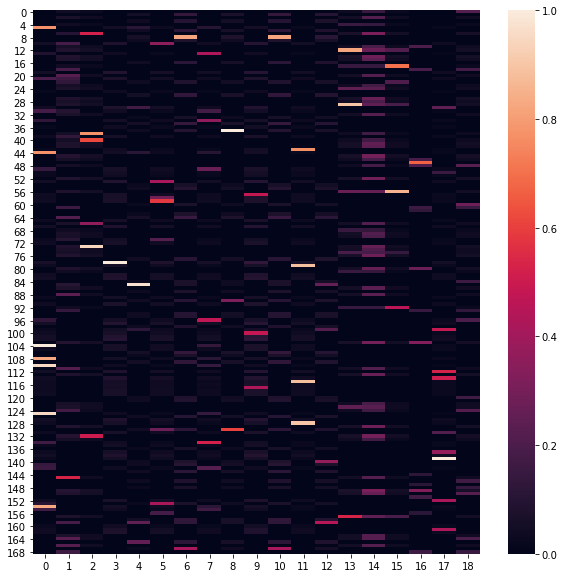

In [74]:
plt.figure(figsize = (10, 10))
ax = sns.heatmap(results)

## Sort Recommendations for Each Test Vector ##

In [78]:
# https://stackoverflow.com/questions/66679020/python-quickest-way-to-sort-list-and-keep-indexes
list(enumerate(results[:,0]))

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.7770166539000284),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0469358958486508),
 (11, 0.0),
 (12, 0.0),
 (13, 0.08978295782983864),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.05008943678390757),
 (20, 0.0),
 (21, 0.1981226980219679),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.021208949628056094),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.044109494997782356),
 (31, 0.18319375079476177),
 (32, 0.0),
 (33, 0.0),
 (34, 0.12503030080307553),
 (35, 0.0),
 (36, 0.02336151443155308),
 (37, 0.0),
 (38, 0.0),
 (39, 0.03315605714505849),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.023414645425241284),
 (44, 0.7770166539000284),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.14174565623394558),
 (50, 0.02778224718429674),
 (51, 0.024310593460428603),
 (52, 0.0),
 (53, 0.05008943678390757),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.03559236107479226),
 (58, 0.03493054616446031)

In [100]:
recommendations = np.argsort(results[:,5])[:-10:-1]
recommendations

array([ 59, 153,  53,  10,  58, 130,  71, 156,  78])

In [102]:
test_keywords[5]

(184, ['design', 'development', 'games', 'learning', 'hhdre'])

In [108]:
rec_list = []
for rec in recommendations:
    print(training_keywords[rec])
    rec_list.append(training_keywords[rec])

(50, ['design', 'development', 'educational', 'technology', 'hhdre'])
(165, ['foundations', 'development', 'policy', 'advanced', 'development', 'economics', 'ghss'])
(60, ['leaders', 'learning', 'hhdre'])
(33, ['introduction', 'game', 'design', 'hhdre'])
(93, ['harvardx', 'alumni', 'explorations', 'learning', 'hhdre'])
(36, ['supply', 'chain', 'design', 'ghss'])
(42, ['introduction', 'data', 'wise', 'collaborative', 'process', 'improve', 'learning', 'teaching', 'hhdre'])
(85, ['mobile', 'application', 'experiences', 'mobile', 'app', 'design', 'cs'])
(143, ['justice', 'hhdre'])


In [109]:
test_df.loc[184]

Institution                                                       MITx
Course Number                                                  11.127x
Course Title              Design and Development of Games for Learning
Instructors                                         [Dimitar Sasselov]
Course Subject       Humanities, History, Design, Religion, and Edu...
subj_codes                                                       hhdre
title_and_subject        [design, development, games, learning, hhdre]
Name: 184, dtype: object

In [112]:
[train_df.loc[rec[0]] for rec in rec_list]

[Institution                                                       MITx
 Course Number                                                  11.132x
 Course Title          Design and Development of Educational Technology
 Instructors                 [Eric Klopfer, Scot Osterweil, Judy Perry]
 Course Subject       Humanities, History, Design, Religion, and Edu...
 subj_codes                                                       hhdre
 title_and_subject    [design, development, educational, technology,...
 Name: 50, dtype: object,
 Institution                                                       MITx
 Course Number                                                   14.74x
 Course Title         Foundations of Development Policy: Advanced De...
 Instructors                                              [David Malan]
 Course Subject                  Government, Health, and Social Science
 subj_codes                                                        ghss
 title_and_subject    [foundations, de